# Analysis and Prediction == >> Used Car  Price In INDIA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')
#for linear regression to predict the result
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

pd.pandas.set_option('display.max_columns',None)

In [2]:
data = pd.read_csv("D:/used_cars_data.csv")

In [3]:
data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
data.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0,NaN,NaN


In [4]:
## print shape of dataset with rows and columns
print(data.shape)

(7253, 14)


In [5]:
# seeing the variable name in dataset
data.columns

Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


* Here the variables Mileage, Engine, Power, Seats, New_Price, and Price have missing values. 
* Numeric variables like Mileage, Power, engine, New_Price  are of datatype are showing object dtype need to change. 
* Categorical variables like Location, Fuel_Type, Transmission, and Owner Type are of object data type

In [4]:
# Checking duplication/ unique value
data.nunique()

S.No.                7253
Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               450
Engine                150
Power                 386
Seats                   9
New_Price             625
Price                1373
dtype: int64

In [5]:
# Missing values Calculation
data.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

In [8]:
# calculate the percentage of missing values in each column
(data.isnull().sum()/(len(data)))*100

S.No.                 0.000000
Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.027575
Engine                0.634220
Power                 0.634220
Seats                 0.730732
New_Price            86.129877
Price                17.013650
dtype: float64

The percentage of missing values for the columns New_Price and Price is ~86% and ~17%, respectively.

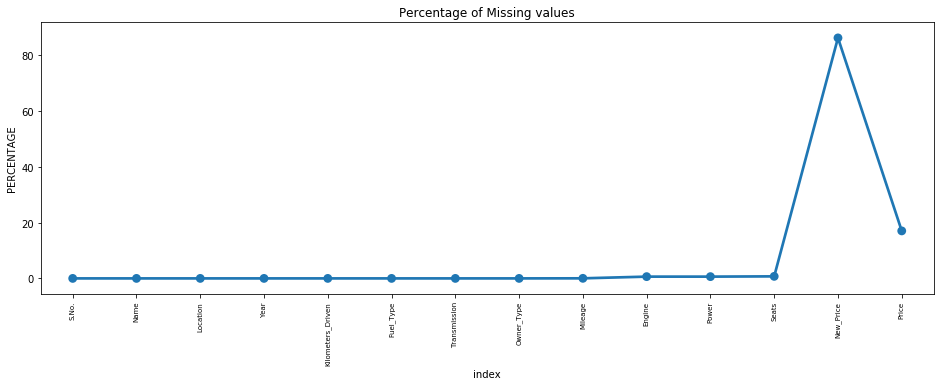

In [20]:
# here finding percentage of missing value for all column visual
missing = pd.DataFrame((data.isnull().sum())*100/data.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

## Initial Intuition

-  **`New_Price`** has only 1006 values. 86 % values are missing

-  **`Price`**, which is a Target variable 17 % missing values.This needs to be analysed further.

-  **`Seats`** has only 53 values missing and number of seats can be one of key factor in deciding price.
-  **`Power`** and **`Engine`** has 46 missing values.

-  **`Mileage`** only has two values missing.

-  **`Mileage`,`Power`,`Engine`,`New_Price`** we know are quantitative variables but are of object dtype here and needs to to converted to numeric.

In [6]:
# Data Reduction removing first column 
data = data.drop(['S.No.'], axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 736.8+ KB


In [9]:
# Making a list of all categorical variables
cat_col = [
    "Fuel_Type",
    "Location",
    "Transmission",
    "Seats",
    "Year",
    "Owner_Type",
    
]
# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("#" * 40)

Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64
########################################
Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: Location, dtype: int64
########################################
Manual       5204
Automatic    2049
Name: Transmission, dtype: int64
########################################
5.0     6047
7.0      796
8.0      170
4.0      119
6.0       38
2.0       18
10.0       8
9.0        3
0.0        1
Name: Seats, dtype: int64
########################################
2015    929
2014    925
2016    886
2013    791
2017    709
2012    690
2011    579
2010    407
2018    361
2009    252
2008    207
2007    148
2019    119
2006     89
2005     68
2004     35
2003     20
2002     18
2001      8
2000      5
1998      4
1999      2
1996      1
Name: 

### Observed Insights 

 - Maximum car being sold have fuel type as Diesel.
 - Mumbai has highest numbers of car availabe for purchase.
 - 5204 cars with Manual transmission are available for purchase.
 - Most of the cars are 5 seaters and First owned.
 - Years of car ranges form 1996- 2015

## Data Preprocessing

### converting into numerical datatype for Engine ,Power and Mileage are object because of unit assigned ,so striping units. 

In [7]:
# checking data 
data[['Engine','Power','Mileage']]

,Engine,Power,Mileage
0,998 CC,58.16 bhp,26.6 km/kg
1,1582 CC,126.2 bhp,19.67 kmpl
2,1199 CC,88.7 bhp,18.2 kmpl
3,1248 CC,88.76 bhp,20.77 kmpl
4,1968 CC,140.8 bhp,15.2 kmpl
...,...,...,...
7248,1598 CC,103.6 bhp,20.54 kmpl
7249,1197 CC,103.6 bhp,17.21 kmpl
7250,1461 CC,63.1 bhp,23.08 kmpl
7251,1197 CC,103.6 bhp,17.2 kmpl


#### Creating copy of base data for manupalation and processing

In [8]:
data_car = data.copy()

In [9]:
data_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 736.8+ KB


In [13]:
typeoffuel=['CNG','LPG']
data_car.loc[data_car.Fuel_Type.isin(typeoffuel)].head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,NaN,2.35
127,Maruti Wagon R LXI CNG,Pune,2013,89900,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,3.25
328,Maruti Zen Estilo LXI Green (CNG),Pune,2008,42496,CNG,Manual,First,26.3 km/kg,998 CC,67.1 bhp,5.0,NaN,1.40
440,Maruti Eeco 5 STR With AC Plus HTR CNG,Kochi,2017,31841,CNG,Manual,First,15.1 km/kg,1196 CC,73 bhp,5.0,NaN,4.70
839,Maruti Alto Green LXi (CNG),Delhi,2012,65537,CNG,Manual,First,26.83 km/kg,796 CC,38.4 bhp,5.0,NaN,2.10
893,Hyundai Accent Executive CNG,Hyderabad,2010,95637,CNG,Manual,Second,13.2 km/kg,1495 CC,93.7 bhp,5.0,NaN,1.90
936,Maruti Wagon R LXI LPG BSIV,Hyderabad,2012,72000,LPG,Manual,First,26.2 km/kg,998 CC,58.2 bhp,5.0,NaN,2.85
987,Maruti Wagon R LXI DUO BSIII,Mumbai,2008,64226,LPG,Manual,First,17.3 km/kg,1061 CC,57.5 bhp,5.0,NaN,1.45
1135,Maruti Zen Estilo LXI Green (CNG),Ahmedabad,2011,76000,CNG,Manual,First,26.3 km/kg,998 CC,67.1 bhp,5.0,NaN,2.00


In [7]:
data_car['Power'].value_counts()

74 bhp        280
98.6 bhp      166
73.9 bhp      152
140 bhp       142
null bhp      129
             ... 
152.88 bhp      1
74.96 bhp       1
199.3 bhp       1
68.1 bhp        1
181.04 bhp      1
Name: Power, Length: 386, dtype: int64

Power has some values as "nullbhp" .Mileage also has some observations as 0. For fuel type and CNG and LPG mileage is measured in km/kg where as for other type it is measured in kmpl. Since those units are in km for both of them no need of conversion . Dropping units from mileages,Engine and Power.

### Mileage

In [8]:
data_car[data_car.Mileage.isnull()==True]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.0,13.58 Lakh,13.00
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.0,NaN,12.75


In [10]:
data_car["Mileage"] = data_car["Mileage"].str.rstrip(" kmpl")
data_car["Mileage"] = data_car["Mileage"].str.rstrip(" km/g")

### Engine

In [11]:
data_car["Engine"] = data_car["Engine"].str.rstrip(" CC")

### Power

In [12]:
data_car["Power"] = data_car["Power"].str.rstrip(" bhp")
data_car["Power"] = data_car["Power"].replace(regex="null", value = np.nan)

In [13]:
#verify the data
data_car[['Engine','Power','Mileage']].sample(10)

,Engine,Power,Mileage
2511,1120,70,24.0
5899,1248,73.9,19.3
1267,1396,69,23.03
164,1498,89.84,22.7
3117,998,67.1,19.0
60,2393,147.8,13.68
2108,2179,140,15.1
6497,1591,121.3,17.01
3135,1591,121.3,17.01
98,998,67.1,18.9


In [14]:
data_car.query("Mileage == '0.0'")['Mileage'].count()

81

In [15]:
#Converting this observations to Nan so we will remember to handle them when handling missing values.
data_car.loc[data_car["Mileage"]=='0.0','Mileage']=np.nan

In [16]:
data_car.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                83
Engine                 46
Power                 175
Seats                  53
New_Price            6247
Price                1234
dtype: int64

There are 46 missing values in Engine, 175 in Power,83 in Mileage.

In [17]:
## Processing seat to check 0 seat if any
data_car.query("Seats == 0.0")['Seats']

3999    0.0
Name: Seats, dtype: float64

In [18]:
#seats cannot be 0 so changing it to nan and will be handled in missing value
data_car.loc[3999,'Seats'] =np.nan

In [18]:
data_car['New_Price'].value_counts()

4.78 Lakh     6
95.13 Lakh    6
63.71 Lakh    6
33.36 Lakh    6
9.12 Lakh     5
             ..
12.33 Lakh    1
33.09 Lakh    1
11.81 Lakh    1
5.88 Lakh     1
14.23 Lakh    1
Name: New_Price, Length: 625, dtype: int64

In [19]:
data_car["New_Price"] = data_car["New_Price"].str.rstrip(" Lakh")
data_car["New_Price"] = data_car["New_Price"].str.rstrip(" Cr")

In [20]:
data_car["New_Price"]

0        NaN
1        NaN
2       8.61
3        NaN
4        NaN
        ... 
7248     NaN
7249     NaN
7250     NaN
7251     NaN
7252     NaN
Name: New_Price, Length: 7253, dtype: object

## Feature Engineering

### Converting datatype

In [21]:
#converting object data type to category data type
data_car["Fuel_Type"] = data_car["Fuel_Type"].astype("category")
data_car["Transmission"] = data_car["Transmission"].astype("category")
data_car["Owner_Type"] = data_car["Owner_Type"].astype("category")
#converting datatype  
data_car["Mileage"] = data_car["Mileage"].astype(float)
data_car["Power"] = data_car["Power"].astype(float)
data_car["Engine"]= data_car["Engine"].astype(float)

In [22]:
data_car["New_Price"] = data_car["New_Price"].astype(float)

In [23]:
data_car.dtypes

Name                   object
Location               object
Year                    int64
Kilometers_Driven       int64
Fuel_Type            category
Transmission         category
Owner_Type           category
Mileage               float64
Engine                float64
Power                 float64
Seats                 float64
New_Price             float64
Price                 float64
dtype: object

### Car Age Processing against current yr

In [24]:
# Coverting Year in Car_age as it will easy to compare car on base of year old car since it greatly effect the price
from datetime import date
date.today().year
data_car['Car_Age']=date.today().year-data['Year']
data_car.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,12
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,7
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,11
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,10
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,9


In [25]:
data_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               7253 non-null   object  
 1   Location           7253 non-null   object  
 2   Year               7253 non-null   int64   
 3   Kilometers_Driven  7253 non-null   int64   
 4   Fuel_Type          7253 non-null   category
 5   Transmission       7253 non-null   category
 6   Owner_Type         7253 non-null   category
 7   Mileage            7170 non-null   float64 
 8   Engine             7207 non-null   float64 
 9   Power              7078 non-null   float64 
 10  Seats              7199 non-null   float64 
 11  New_Price          1006 non-null   float64 
 12  Price              6019 non-null   float64 
 13  Car_Age            7253 non-null   int64   
dtypes: category(3), float64(6), int64(3), object(2)
memory usage: 645.2+ KB


### Creating Feature ( split name into car brand and model)

In [26]:
# Brands do play an important role in Car selection and Prices. So extracting brand names from the Name.
data_car['Brand'] = data_car.Name.str.split().str.get(0)
data_car['Model'] = data_car.Name.str.split().str.get(1) + data_car.Name.str.split().str.get(2)
data_car[['Name','Brand','Model']]

,Name,Brand,Model
0,Maruti Wagon R LXI CNG,Maruti,WagonR
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Creta1.6
2,Honda Jazz V,Honda,JazzV
3,Maruti Ertiga VDI,Maruti,ErtigaVDI
4,Audi A4 New 2.0 TDI Multitronic,Audi,A4New
...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Volkswagen,VentoDiesel
7249,Volkswagen Polo GT TSI,Volkswagen,PoloGT
7250,Nissan Micra Diesel XV,Nissan,MicraDiesel
7251,Volkswagen Polo GT TSI,Volkswagen,PoloGT


In [26]:
data_car.Brand.unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini', 'Hindustan', 'OpelCorsa'], dtype=object)

In [37]:
# checking column for correcting brand names
col=['ISUZU','Isuzu','Mini','Land']
data_car[data_car.Brand.isin(col)].sample(10)

,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age,Brand,Model
14,Land Rover Freelander 2 TD4 SE,Pune,85000,Diesel,Automatic,Second,NaN,2179.0,115.00,5.0,NaN,17.50,10,Land,RoverFreelander
4801,Land Rover Freelander 2 SE,Hyderabad,68000,Diesel,Automatic,First,12.39,2179.0,147.51,5.0,NaN,22.00,11,Land,RoverFreelander
749,Land Rover Range Rover 3.0 D,Mumbai,55001,Diesel,Automatic,Second,NaN,NaN,NaN,NaN,NaN,26.50,14,Land,RoverRange
941,Land Rover Range Rover Evoque 2.0 TD4 HSE Dynamic,Kochi,31427,Diesel,Automatic,First,15.68,1999.0,177.00,5.0,75.12,59.72,4,Land,RoverRange
7198,Land Rover Discovery 4 TDV6 Auto Diesel,Hyderabad,147202,Diesel,Automatic,First,11.80,2993.0,241.60,7.0,NaN,NaN,10,Land,RoverDiscovery
399,Land Rover Range Rover 2.2L Dynamic,Hyderabad,56000,Diesel,Automatic,First,12.70,2179.0,187.70,5.0,NaN,30.00,10,Land,RoverRange
5016,Land Rover Freelander 2 TD4 HSE,Delhi,72000,Diesel,Automatic,First,NaN,2179.0,115.00,5.0,NaN,15.50,9,Land,RoverFreelander
3540,Land Rover Discovery Sport SD4 HSE Luxury 7S,Hyderabad,62000,Diesel,Automatic,First,12.51,2179.0,187.70,7.0,NaN,44.50,6,Land,RoverDiscovery
1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,69078,Petrol,Manual,First,NaN,NaN,NaN,NaN,NaN,40.88,14,Land,RoverRange
3242,Land Rover Range Rover Vogue SE 4.4 SDV8,Bangalore,63000,Diesel,Automatic,Second,11.49,4367.0,335.30,5.0,NaN,65.00,10,Land,RoverRange


Brand names like ISUZU and Isuzu are same and needs to be corrected. Land, Mini seems to be incorrect. So correcting brand names.

In [27]:
#changing brandnames
data_car.loc[data_car.Brand == 'ISUZU','Brand']='Isuzu'
data_car.loc[data_car.Brand=='Mini','Brand']='Mini Cooper'
data_car.loc[data_car.Brand=='Land','Brand']='Land Rover'

In [28]:
data_car['Brand']=data_car["Brand"].astype("category")

In [29]:
data_car['Model']=data_car["Model"].astype("category")

In [30]:
data_car.Brand.nunique()

32

In [33]:
data_car.groupby(data_car.Brand).size().sort_values(ascending =False)

Brand
Maruti           1444
Hyundai          1340
Honda             743
Toyota            507
Mercedes-Benz     380
Volkswagen        374
Ford              351
Mahindra          331
BMW               312
Audi              285
Tata              228
Skoda             202
Renault           170
Chevrolet         151
Nissan            117
Land Rover         67
Jaguar             48
Fiat               38
Mitsubishi         36
Mini Cooper        31
Volvo              28
Jeep               19
Porsche            19
Datsun             17
Isuzu               5
Force               3
Bentley             2
Lamborghini         1
Hindustan           1
OpelCorsa           1
Smart               1
Ambassador          1
dtype: int64

There are 32 unique Brands in the dataset.Maruti brand is most available for purchase/Sold followed by Hyundai.

In [31]:
data_car.Brand.isnull().sum()

0

In [32]:
data_car.Model.isnull().sum()

1

In [33]:
#drop row with no model
data_car.dropna(subset=['Model'],axis=0,inplace=True)

In [34]:
data_car.Model.nunique()

726

In [35]:
data_car['Model'].value_counts().nlargest(20)

SwiftDzire      189
Grandi10        179
WagonR          178
Innova2.5       145
Verna1.6        127
City1.5         122
Cityi           115
NewC-Class      110
Creta1.6        110
3Series         109
SwiftVDI         96
5Series          86
i201.2           78
SantroXing       76
i10Sportz        75
XUV500W8         75
i10Magna         69
AmazeS           69
CorollaAltis     63
Alto800          63
Name: Model, dtype: int64

There are 726 unique models and Swift Dzire is most popular Model.

## EDA

### descritive statistics analysis

In [36]:
data_car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7252 entries, 0 to 7252
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               7252 non-null   object  
 1   Location           7252 non-null   object  
 2   Year               7252 non-null   int64   
 3   Kilometers_Driven  7252 non-null   int64   
 4   Fuel_Type          7252 non-null   category
 5   Transmission       7252 non-null   category
 6   Owner_Type         7252 non-null   category
 7   Mileage            7169 non-null   float64 
 8   Engine             7206 non-null   float64 
 9   Power              7077 non-null   float64 
 10  Seats              7198 non-null   float64 
 11  New_Price          1006 non-null   float64 
 12  Price              6019 non-null   float64 
 13  Car_Age            7252 non-null   int64   
 14  Brand              7252 non-null   category
 15  Model              7252 non-null   category
dtypes: cat

In [37]:
data_car.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7252.0,2013.366520,3.253162,1996.00,2011.000,2014.00,2016.00,2019.00
Kilometers_Driven,7252.0,58700.262686,84433.480370,171.00,34000.000,53429.00,73000.00,6500000.00
Mileage,7169.0,18.347106,4.157912,6.40,15.300,18.20,21.10,33.54
Engine,7206.0,1616.605051,595.320408,72.00,1198.000,1493.00,1968.00,5998.00
Power,7077.0,112.768713,53.496523,34.20,75.000,94.00,138.10,616.00
Seats,7198.0,5.280495,0.809376,2.00,5.000,5.00,5.00,10.00
New_Price,1006.0,19.894324,19.813947,1.00,7.635,11.27,23.64,99.92
Price,6019.0,9.479468,11.187917,0.44,3.500,5.64,9.95,160.00
Car_Age,7252.0,8.633480,3.253162,3.00,6.000,8.00,11.00,26.00


### Observed Insights

* age of car range from 3 to 25+ yr were oldest car is 26 yr old and avg. age of car is about 8.6 yr.
* On average of Kilometers-driven in Used cars are ~58k KM. The range shows a huge difference between min and max as max values show 650000 KM shows the evidence of an outlier. This record can be removed.
* Mileage is almost Normally distrubuted.
* Engine type (in cc) is right skewed and there may be outliers on higher and lower end
* There may also  be some outlier in power & price.
* Price of car max. 160lakh high is very against other data which may be due outlier.

### Separate Numerical and categorical variables

In [38]:
cat_cols=data_car.select_dtypes(include=['object','category']).columns
num_cols = data_car.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Brand',
       'Model'],
      dtype='object')
Numerical Variables:
['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'New_Price', 'Price', 'Car_Age']


# Univariate Analysis

###  First Analysis for numerical variable & categorical variable in term of skewness and outliers

Year
Skew : -0.84


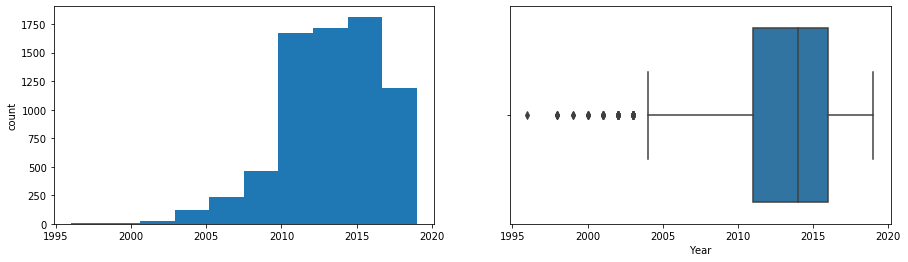

Kilometers_Driven
Skew : 61.58


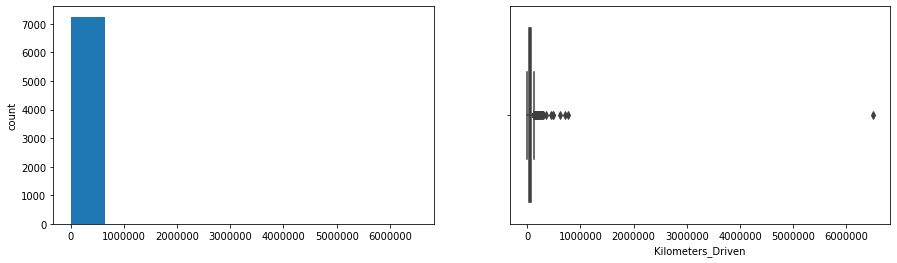

Mileage
Skew : 0.2


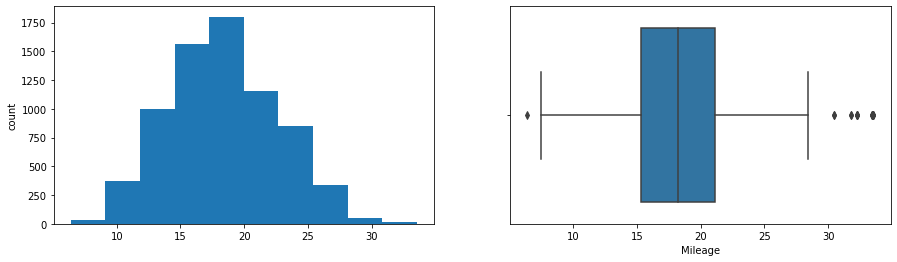

Engine
Skew : 1.41


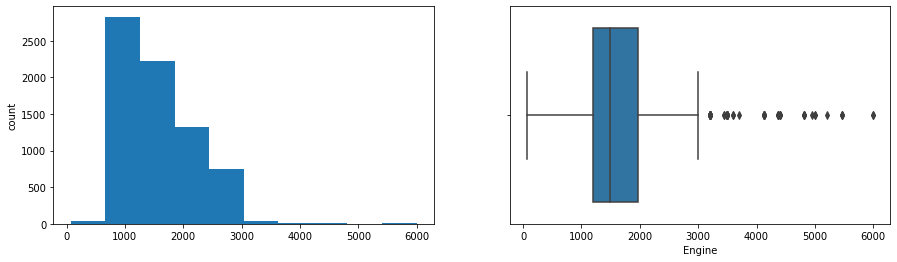

Power
Skew : 1.96


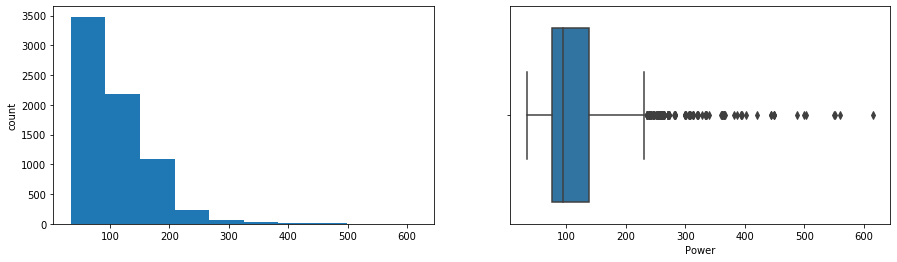

Seats
Skew : 1.95


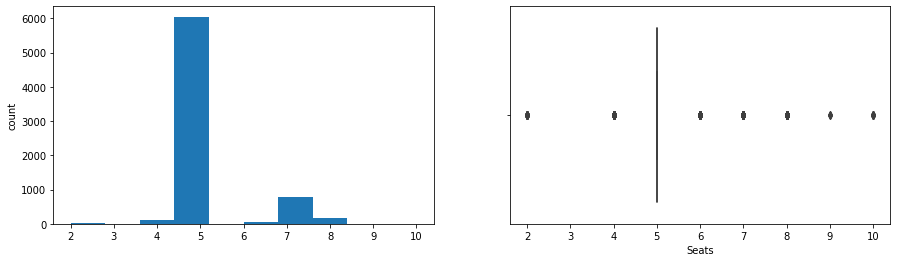

New_Price
Skew : 1.84


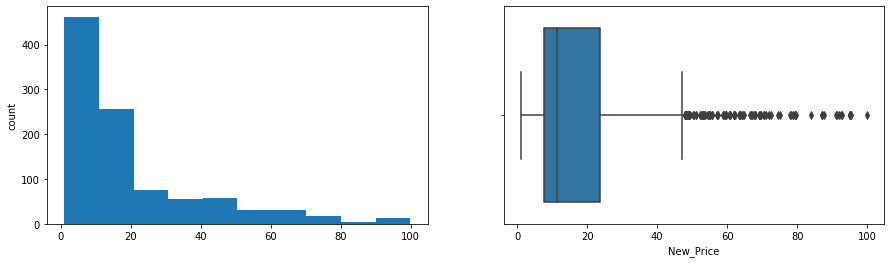

Price
Skew : 3.34


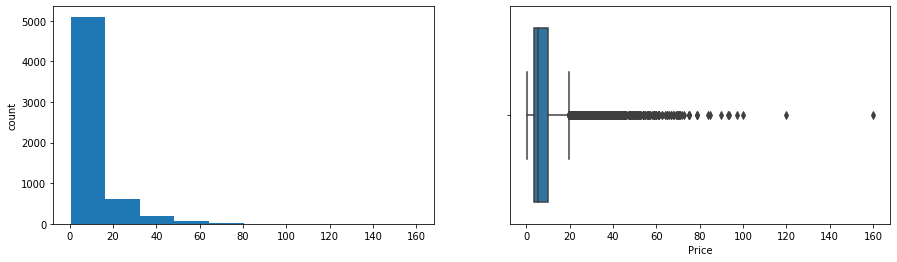

Car_Age
Skew : 0.84


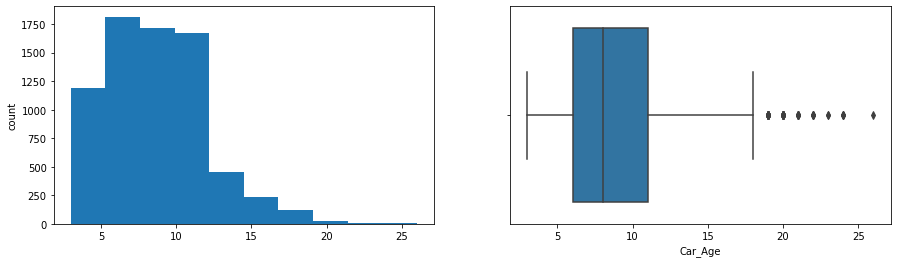

In [41]:
for col in num_cols:
    print(col)
    print('Skew :', round(data_car[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    data_car[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data_car[col])
    plt.show()

* Variable column of Price, New price, Kilometers Driven & power are right skewed for this data to be transformed, and all outliers will be handled during imputation.
* Mileage show good nurmal distribution curve
* Year variable look to be left skew

In [54]:
# Analysis for categorical variable

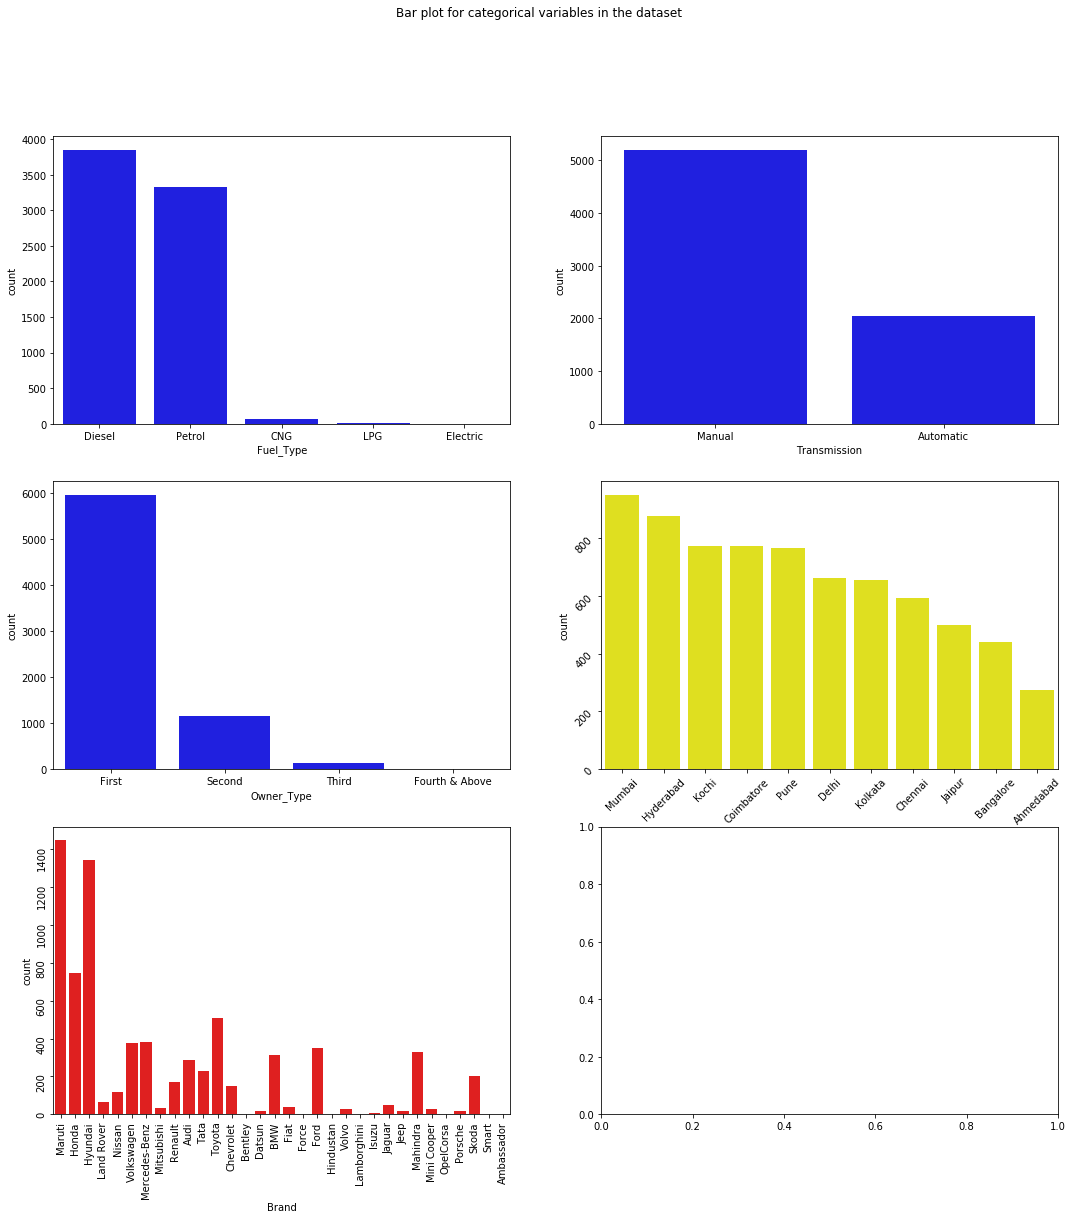

In [42]:
fig, axes = plt.subplots(3, 2, figsize = (18, 18))
fig.suptitle('Bar plot for categorical variables in the dataset')
sns.countplot(ax = axes[0, 0], x = 'Fuel_Type', data = data_car, color = 'blue', 
              order = data_car['Fuel_Type'].value_counts().index);
sns.countplot(ax = axes[0, 1], x = 'Transmission', data = data_car, color = 'blue', 
              order = data_car['Transmission'].value_counts().index);
sns.countplot(ax = axes[1, 0], x = 'Owner_Type', data = data_car, color = 'blue', 
              order = data_car['Owner_Type'].value_counts().index);
sns.countplot(ax = axes[1, 1], x = 'Location', data = data_car, color = 'yellow', 
              order = data_car['Location'].value_counts().index);
sns.countplot(ax = axes[2, 0], x = 'Brand', data = data_car, color = 'red', 
              order = data_car['Brand'].head(20).value_counts().index);
axes[1][1].tick_params(labelrotation=45);
axes[2][0].tick_params(labelrotation=90);

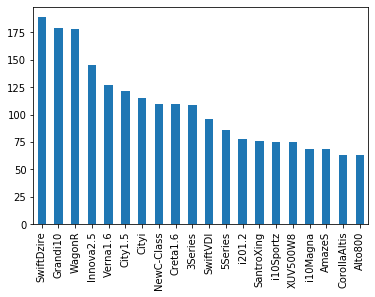

In [40]:
# For Model 
data_car['Model'].value_counts().nlargest(20).plot(kind='bar');
plt.show()

### obeserved insights
* Mumbai has the highest number of cars available for purchase, followed by Hyderabad and Coimbatore
* 53% of cars have fuel type as Diesel this shows diesel cars provide higher performance
* 72% of cars have manual transmission
* 82 % of cars are First owned cars. This shows most of the buyers prefer to purchase first-owner cars
* 20% of cars belong to the brand Maruti followed by 19% of cars belonging to Hyundai
swiftDzire ranks first among all models which are available for purchase.

## Data trasformation
As we check earlier show of variable data are highly skewed with is not good for model building in further.
so using here log transformation for normalization of data.

In [39]:
# Function for log transformation of the column
def log_transform(data_car,col):
    for colname in col:
        if (data_car[colname] == 1.0).all():
            data_car[colname + '_log'] = np.log(data_car[colname]+1)
        else:
            data_car[colname + '_log'] = np.log(data_car[colname])
    data_car.info()

In [40]:
log_transform(data_car,['Kilometers_Driven','Price'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7252 entries, 0 to 7252
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Name                   7252 non-null   object  
 1   Location               7252 non-null   object  
 2   Year                   7252 non-null   int64   
 3   Kilometers_Driven      7252 non-null   int64   
 4   Fuel_Type              7252 non-null   category
 5   Transmission           7252 non-null   category
 6   Owner_Type             7252 non-null   category
 7   Mileage                7169 non-null   float64 
 8   Engine                 7206 non-null   float64 
 9   Power                  7077 non-null   float64 
 10  Seats                  7198 non-null   float64 
 11  New_Price              1006 non-null   float64 
 12  Price                  6019 non-null   float64 
 13  Car_Age                7252 non-null   int64   
 14  Brand                  7252 non-null   c

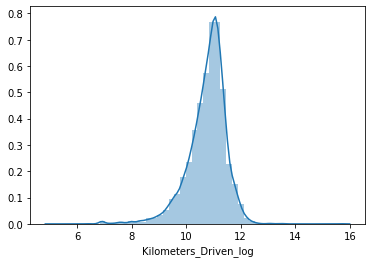

In [39]:
#Log transformation of the feature 'Kilometers_Driven'
sns.distplot(data_car["Kilometers_Driven_log"], axlabel="Kilometers_Driven_log");

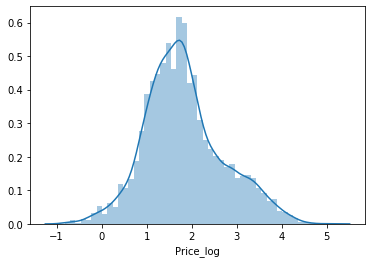

In [40]:
#Log transformation of the feature 'price'
sns.distplot(data_car["Price_log"], axlabel="Price_log");

# Bivariate Analysis

### checking relationship between two numerical variable using pair plot

<Figure size 1080x1296 with 0 Axes>

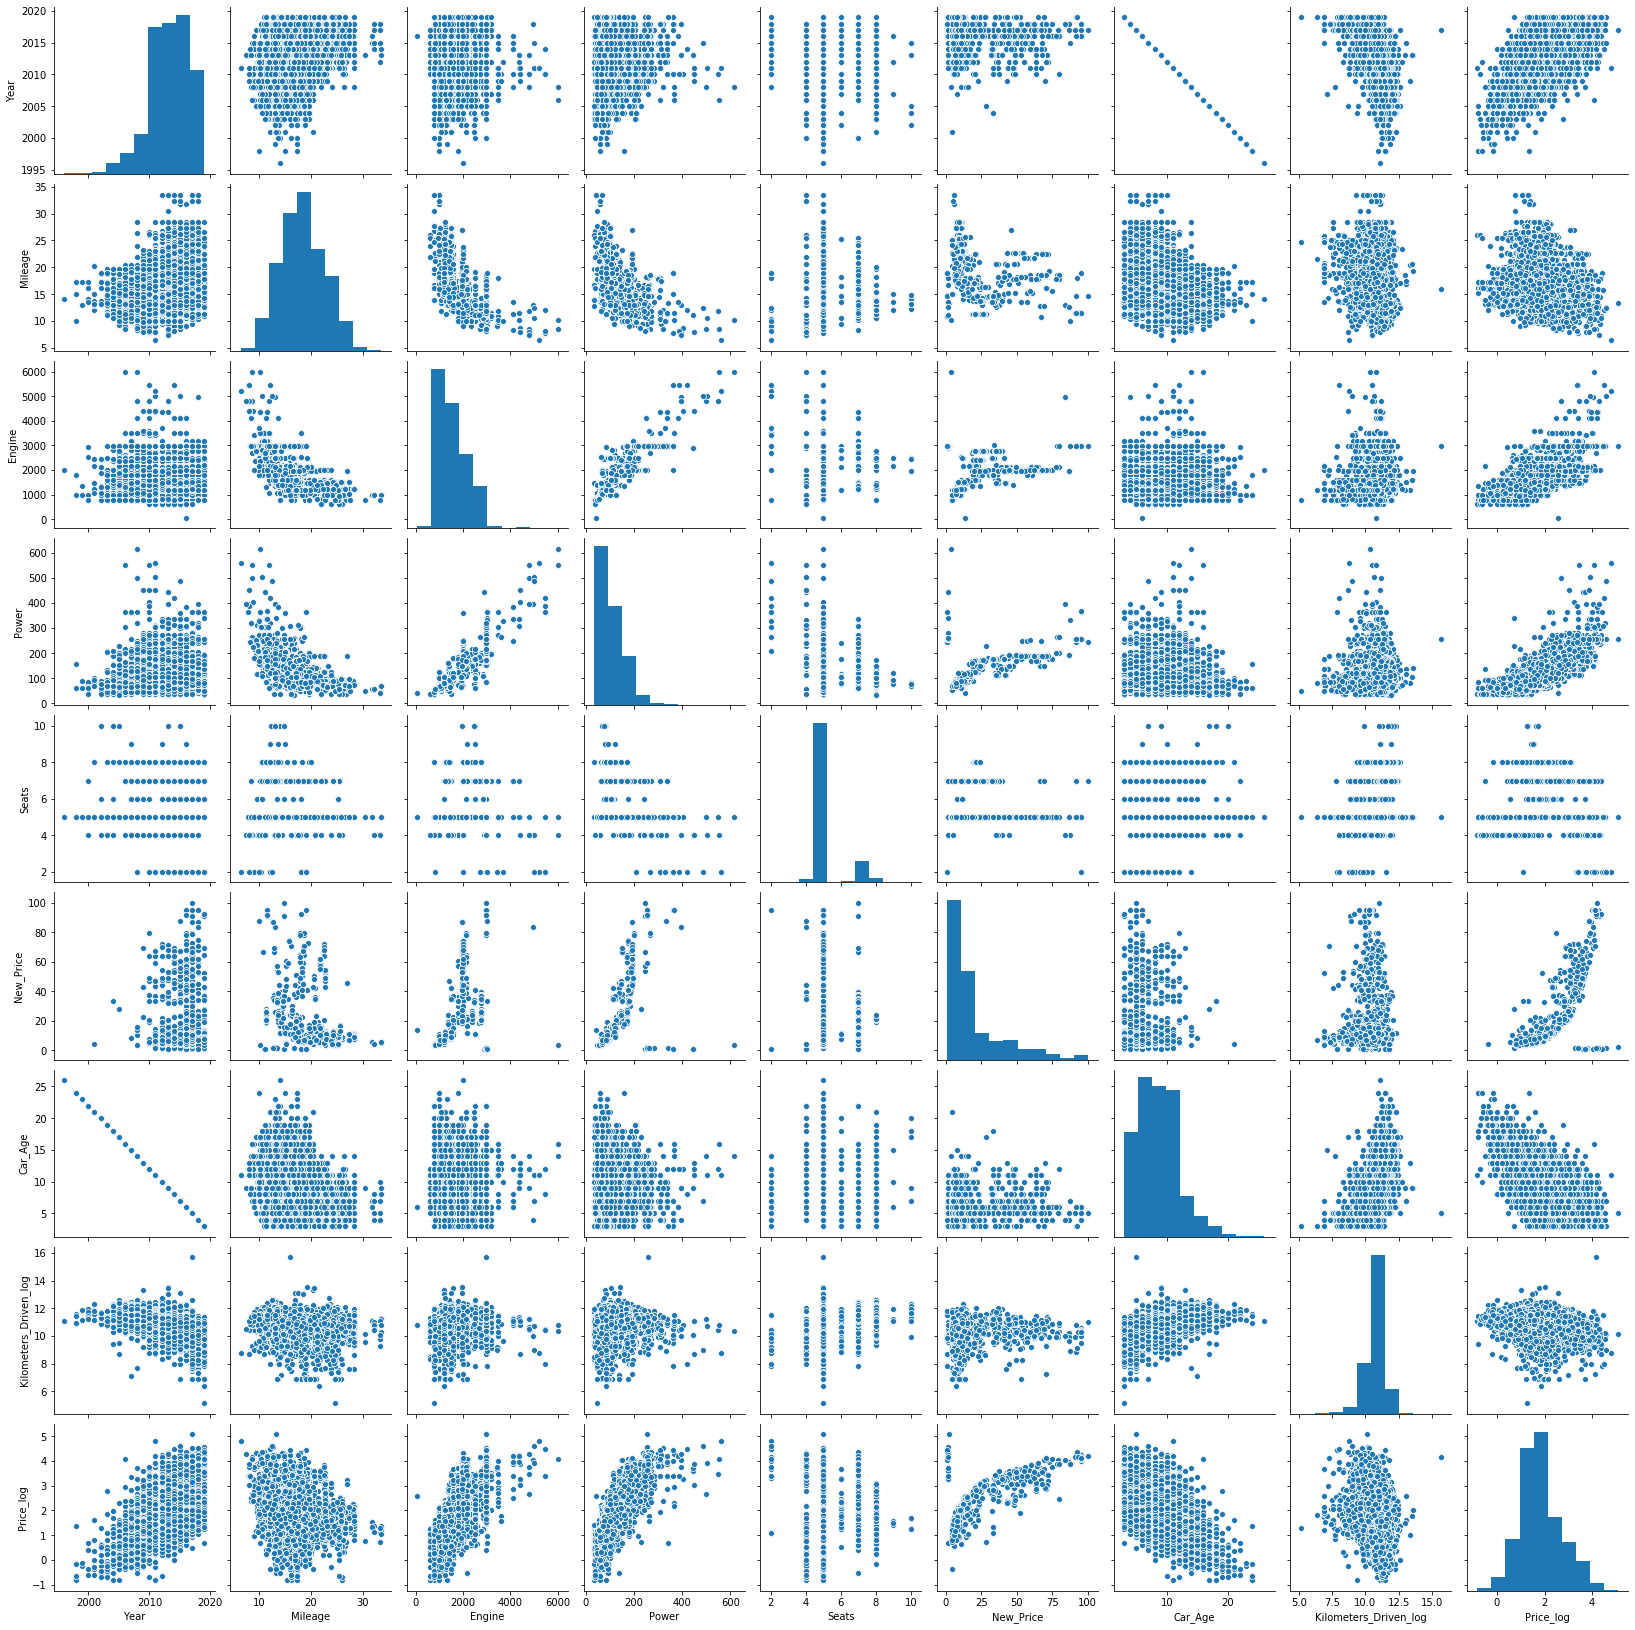

In [48]:
plt.figure(figsize=(15,18))
sns.pairplot(data=data_car.drop(['Kilometers_Driven','Price'],axis=1))
plt.show()

### Pair Plot based insights:

* The variable Year has a positive correlation with price and mileage
* A year has a Negative correlation with kilometers-Driven which mean with inc. in age of car performance decreases
* Mileage is negatively correlated with Power, As power increases, mileage decreases
* Car with recent make is higher at prices. As the age of the car increases price decreases
* Engine and Power increase, and the price of the car increases
* As engine inc. Power against increase

### using bar plot for analysis of relationship between price(dependent variable) vs categorical variable

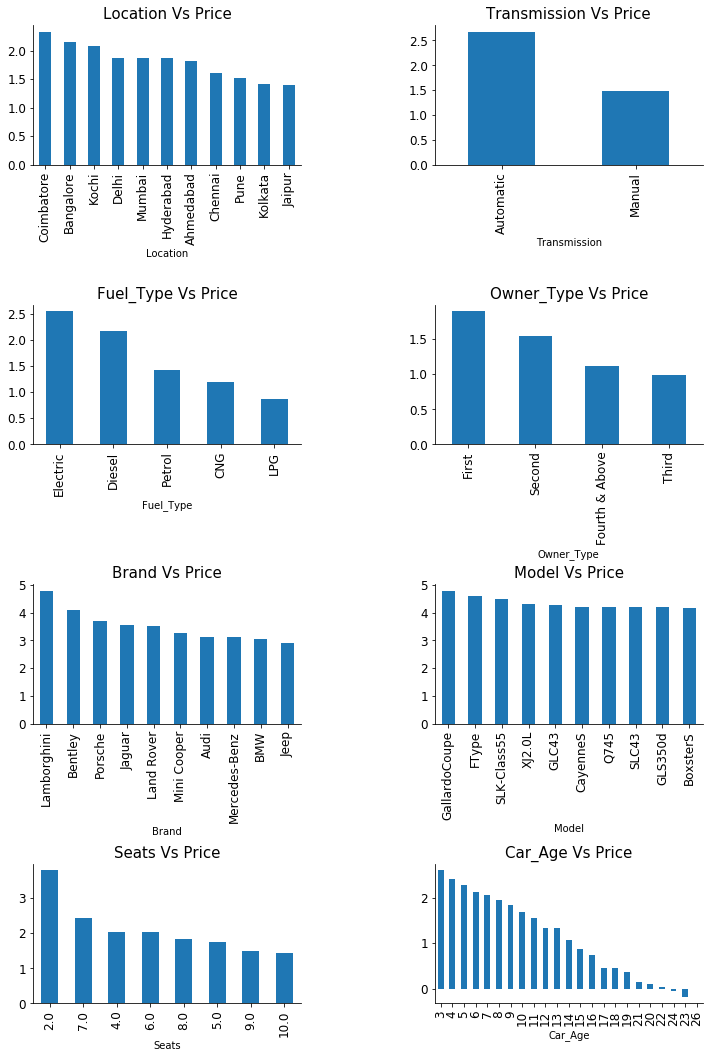

In [52]:
fig, axarr = plt.subplots(4, 2, figsize=(12, 18))
data_car.groupby('Location')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][0], fontsize=12)
axarr[0][0].set_title("Location Vs Price", fontsize=15)
data_car.groupby('Transmission')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][1], fontsize=12)
axarr[0][1].set_title("Transmission Vs Price", fontsize=15)
data_car.groupby('Fuel_Type')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][0], fontsize=12)
axarr[1][0].set_title("Fuel_Type Vs Price", fontsize=15)
data_car.groupby('Owner_Type')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][1], fontsize=12)
axarr[1][1].set_title("Owner_Type Vs Price", fontsize=15)
data_car.groupby('Brand')['Price_log'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[2][0], fontsize=12)
axarr[2][0].set_title("Brand Vs Price", fontsize=15)
data_car.groupby('Model')['Price_log'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[2][1], fontsize=12)
axarr[2][1].set_title("Model Vs Price", fontsize=15)
data_car.groupby('Seats')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[3][0], fontsize=12)
axarr[3][0].set_title("Seats Vs Price", fontsize=15)
data_car.groupby('Car_Age')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[3][1], fontsize=12)
axarr[3][1].set_title("Car_Age Vs Price", fontsize=15)
plt.subplots_adjust(hspace=1.0)
plt.subplots_adjust(wspace=.5)
sns.despine()

### Observations

* The price of cars is high in Coimbatore, Bangalore and less price in Kolkata and Jaipur
* Automatic cars have more price than manual cars.
* Electric cars price is maximum which follow by diesel, and LPG cars have the lowest price
* First-owner cars are higher in price, followed by a second,The third owner’s price is lesser than the Fourth and above
* Lamborghini brand is the highest in price
* Gallardocoupe Model is the highest in price
* 2 Seater has the highest price followed by 7 Seater
* The latest model cars are high in price

# Multivariate Analysis

 Multivariate analysis looks at more than two variables using heatmap, Heat Map gives the correlation between the variables, whether it has a positive or negative correlation.

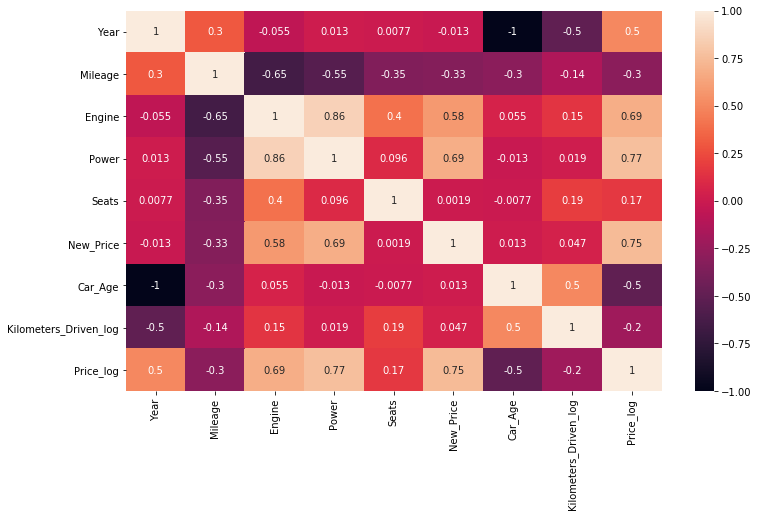

In [53]:
plt.figure(figsize=(12, 7))
sns.heatmap(data_car.drop(['Kilometers_Driven','Price'],axis=1).corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

#### Oveserved insights From the Heat map:

* The engine has a strong positive correlation to Power 0.86
* Price has a positive correlation to Engine 0.69 as well Power 0.77
* Mileage has correlated to Engine, Power, and Price negatively
* Price is moderately positive in correlation to year.
* Kilometer driven has a negative correlation to year not much impact on the price
* Car age has a negative correlation with Price
* car Age is positively correlated to Kilometers-Driven as the Age of the car increases; then the kilometer will also increase   of car has a negative correlation with Mileage this makes sense

# Imputing Missing Value

In [41]:
data_car.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                    83
Engine                     46
Power                     175
Seats                      54
New_Price                6246
Price                    1233
Car_Age                     0
Brand                       0
Model                       0
Kilometers_Driven_log       0
Price_log                1233
dtype: int64

Here we are using median for imputing missing value

In [42]:
data_car["Seats"].fillna(data_car["Seats"].median(),inplace=True)

In [45]:
data_car["Mileage"].fillna(data_car["Mileage"].median(),inplace=True)

In [43]:
data_car["Engine"].fillna(data_car["Engine"].median(),inplace=True)
data_car["Power"].fillna(data_car["Power"].median(),inplace=True)
data_car["Seats"].fillna(data_car["Seats"].median(),inplace=True)
data_car["Price"].fillna(data_car["Price"].median(),inplace=True)
data_car["New_Price"].fillna(data_car["New_Price"].median(),inplace=True)
data_car["Price_log"].fillna(data_car["Price_log"].median(),inplace=True)

Now lets check whether all the missing values are filled in the dataset.

In [46]:
data_car.isnull().sum(axis=0)

Name                     0
Location                 0
Year                     0
Kilometers_Driven        0
Fuel_Type                0
Transmission             0
Owner_Type               0
Mileage                  0
Engine                   0
Power                    0
Seats                    0
New_Price                0
Price                    0
Car_Age                  0
Brand                    0
Model                    0
Kilometers_Driven_log    0
Price_log                0
dtype: int64

In [53]:
data_car

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age,Brand,Model,Kilometers_Driven_log,Price_log
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,11.27,1.75,12,Maruti,WagonR,11.184421,0.559616
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,11.27,12.50,7,Hyundai,Creta1.6,10.621327,2.525729
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,11,Honda,JazzV,10.736397,1.504077
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,11.27,6.00,10,Maruti,ErtigaVDI,11.373663,1.791759
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,11.27,17.74,9,Audi,A4New,10.613246,2.875822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.60,5.0,11.27,5.64,11,Volkswagen,VentoDiesel,11.400999,1.729884
7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.60,5.0,11.27,5.64,7,Volkswagen,PoloGT,10.985293,1.729884
7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.10,5.0,11.27,5.64,10,Nissan,MicraDiesel,10.239960,1.729884
7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.60,5.0,11.27,5.64,9,Volkswagen,PoloGT,10.864025,1.729884


Year
Skew : -0.84


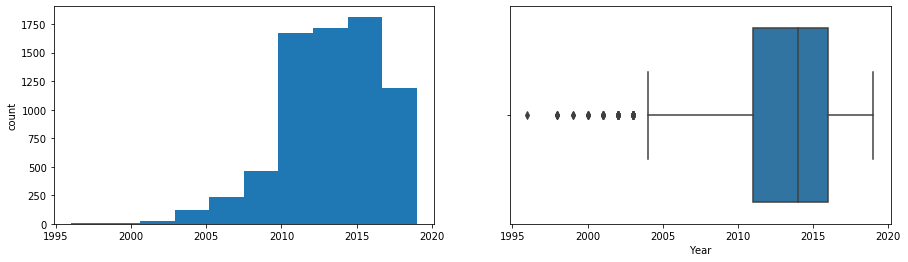

Kilometers_Driven
Skew : 61.58


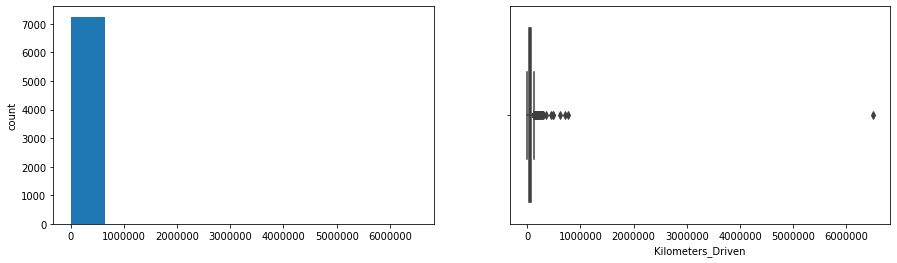

Mileage
Skew : 0.21


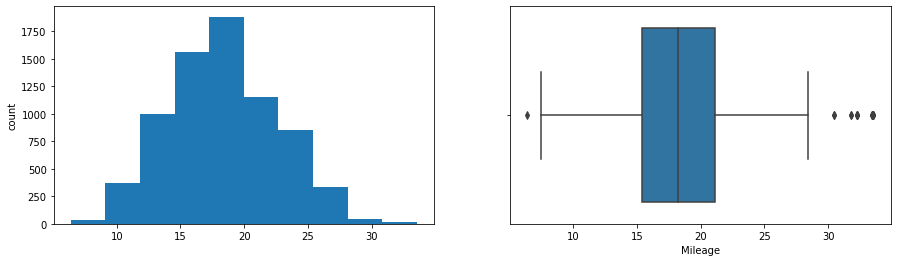

Engine
Skew : 1.42


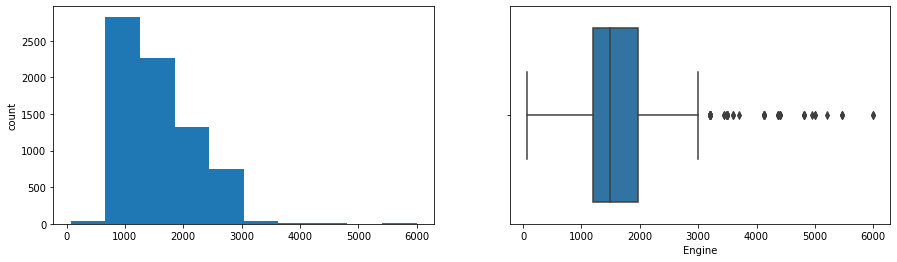

Power
Skew : 2.0


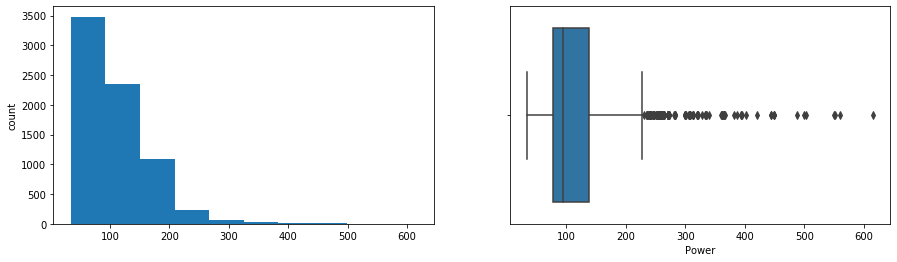

Seats
Skew : 1.97


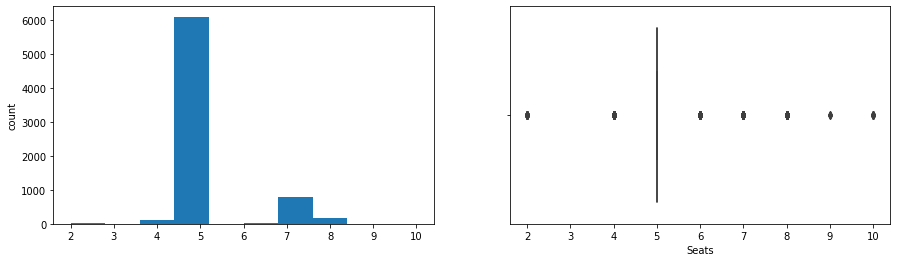

New_Price
Skew : 6.46


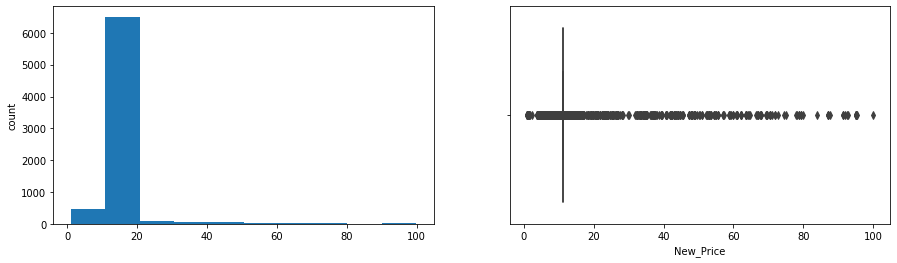

Price
Skew : 3.74


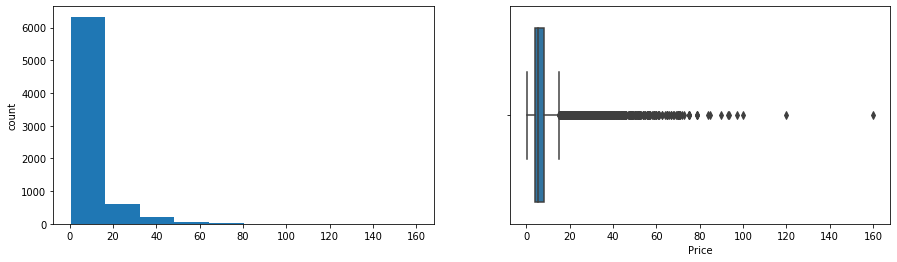

Car_Age
Skew : 0.84


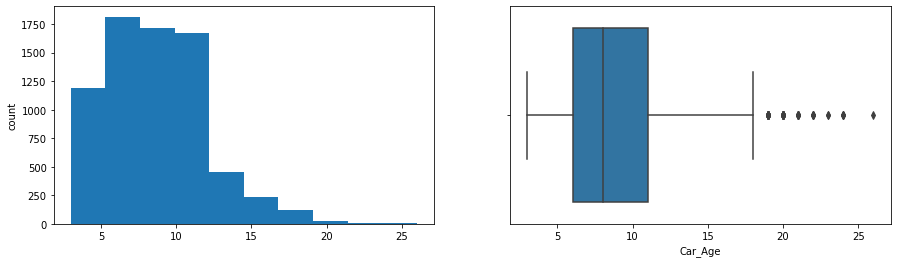

Kilometers_Driven_log
Skew : -1.3


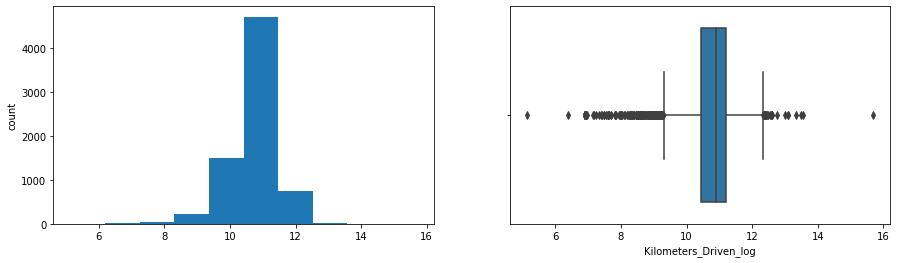

Price_log
Skew : 0.52


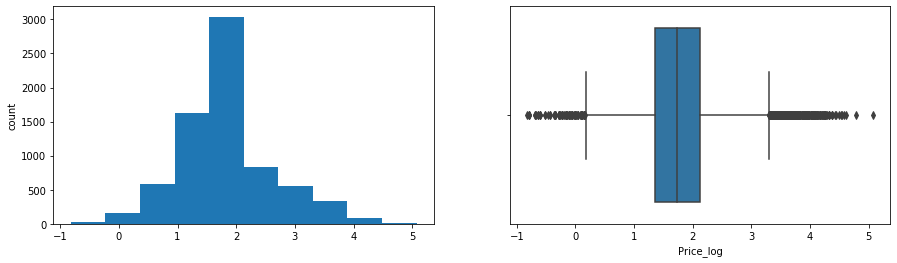

In [69]:
for col in num_cols:
    print(col)
    print('Skew :', round(data_car[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    data_car[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data_car[col])
    plt.show()

### Outlier Treatment

#### replacing respective column outlier with respective mean values 

In [47]:
# treating mileage column
data_car.loc[data_car['Mileage']>30,'Mileage']=np.mean(data_car['Mileage'])

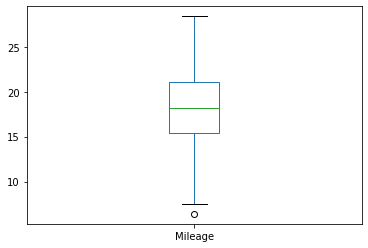

In [48]:
data_car['Mileage'].plot.box()

In [49]:
# Treating Engine Column
data_car.loc[data_car["Engine"]>3000,"Engine"]=np.mean(data_car["Engine"])

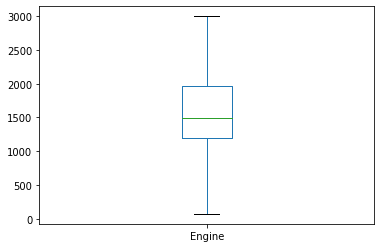

In [50]:
data_car['Engine'].plot.box()

In [51]:
# Treating Power Column
data_car.loc[data_car["Power"]>200,"Power"]=np.mean(data_car["Power"])

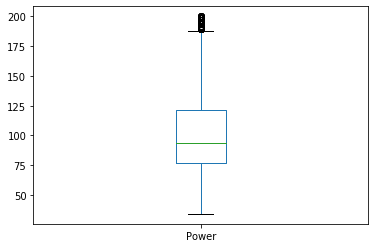

In [52]:
data_car["Power"].plot.box()

In [ ]:
# Treating 

## Some more analysis for Variables that are correlated with Price variable

Price Vs Engine Vs Transmission

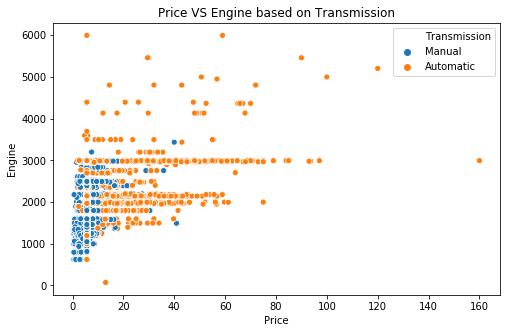

In [64]:
# understand relation ship of Engine vs Price and Transmimssion
plt.figure(figsize=(8,5))

plt.title("Price VS Engine based on Transmission")
sns.scatterplot(y='Engine', x='Price', hue='Transmission', data=data_car)

#### Price Vs Power vs Transmission

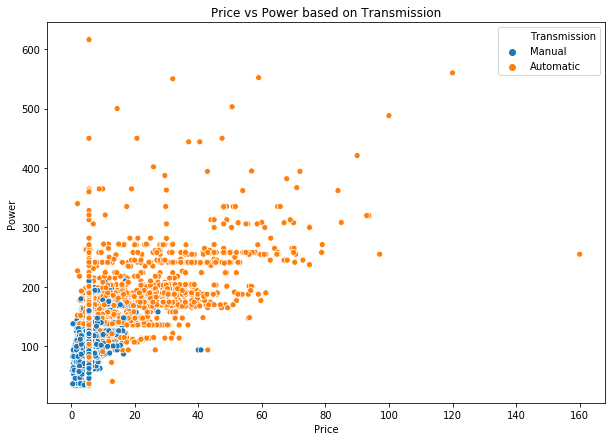

In [65]:
#understand relationship betweem Price and Power
plt.figure(figsize=10,7))
plt.title("Price vs Power based on Transmission")
sns.scatterplot(y='Power', x='Price', hue='Transmission', data=data_car)

#### Price Vs Mileage Vs Transmission

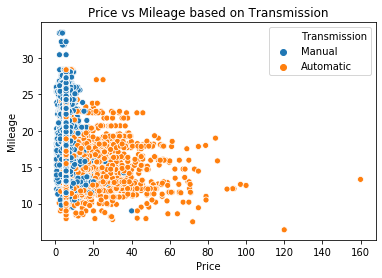

In [70]:
# Understand the relationships  between mileage and Price

plt.title("Price vs Mileage based on Transmission")
sns.scatterplot(y='Mileage', x='Price', hue='Transmission', data=data_car)

#### Price Vs Year Vs Transmission

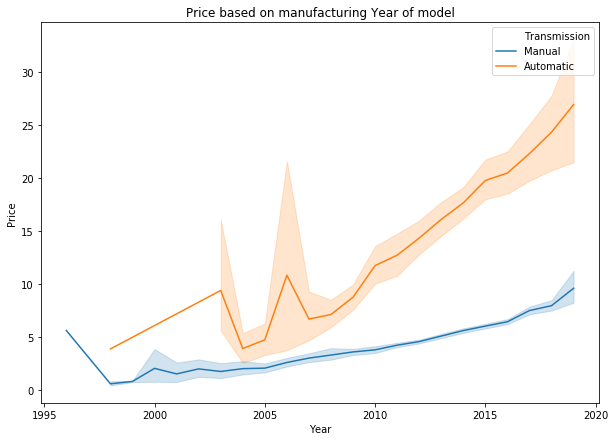

In [71]:
# Impact of years on price 
plt.figure(figsize=(10,7))
plt.title("Price based on manufacturing Year of model")
sns.lineplot(x='Year', y='Price',hue='Transmission', data=data_car)

#### Price Vs Year VS Fuel Type
Change in price over the year

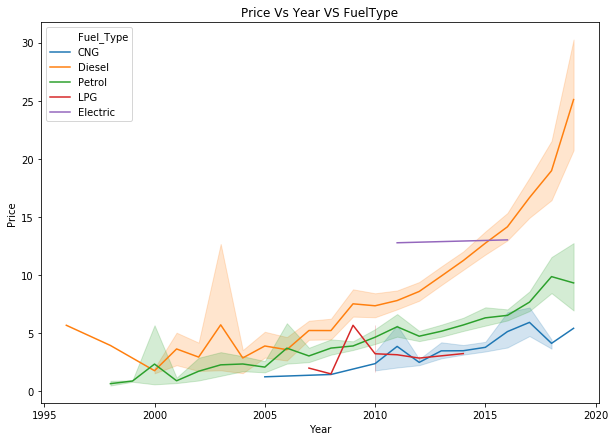

In [72]:
# Impact of years on price 
plt.figure(figsize=(10,7))
plt.title("Price Vs Year VS FuelType")
sns.lineplot(x='Year', y='Price',hue='Fuel_Type', data=data_car)

#### Price Vs Mileage vs Fuel_type

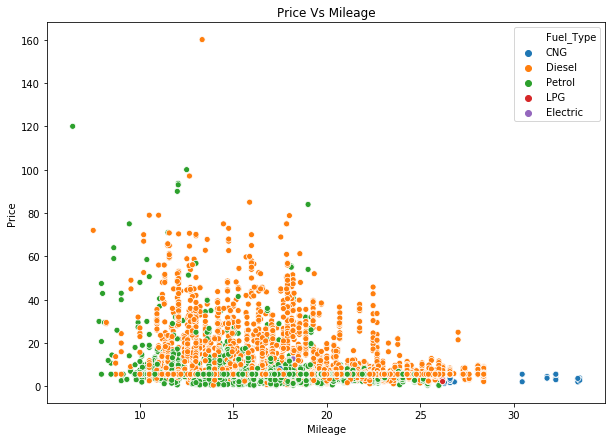

In [73]:
# Understand relationships  between price and mileage
plt.figure(figsize=(10,7))
plt.title("Price Vs Mileage")
sns.scatterplot(y='Price', x='Mileage', hue='Fuel_Type', data=data_car)

# Insights based on EDA

* Expensive cars are in Coimbatore and Bangalore.
* 2 Seater cars are more expensive.
* Here Diesel Fuel type car are more expensive compared to other fuel type.
* As expected, Older model are sold cheaper compared to latest model
* Automatic transmission vehicle have a higher price than manual transmission vehicles.
* Vehicles with more engine capacity have higher prices.
* Customers prefer to purchase the First owner rather than the Second or Third.
* Automatic transmission require high engine and power.
* Prices for Cars with fuel type as Deisel has increased with recent models
* Engine,Power, how old the car his, Mileage,Fuel type,location,Transmission effect the price.

In [53]:
data_pred = data_car.copy()
data_pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7252 entries, 0 to 7252
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Name                   7252 non-null   object  
 1   Location               7252 non-null   object  
 2   Year                   7252 non-null   int64   
 3   Kilometers_Driven      7252 non-null   int64   
 4   Fuel_Type              7252 non-null   category
 5   Transmission           7252 non-null   category
 6   Owner_Type             7252 non-null   category
 7   Mileage                7252 non-null   float64 
 8   Engine                 7252 non-null   float64 
 9   Power                  7252 non-null   float64 
 10  Seats                  7252 non-null   float64 
 11  New_Price              7252 non-null   float64 
 12  Price                  7252 non-null   float64 
 13  Car_Age                7252 non-null   int64   
 14  Brand                  7252 non-null   c

In [51]:
# droping column which not be used in model building as keeping some feature can create lot of dummies variable specially for categorical 
data_pred.drop(['Name','Model','Year','Brand','New_Price'],axis=1,inplace=True)

# Model Building

#### Model 1

In [54]:
# droping column which not be used in model building as keeping some feature can create lot of dummies variable specially for categorical 
data_pred.drop(['Name','Model','Year','Brand','New_Price'],axis=1,inplace=True)

In [55]:
data_pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7252 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Location               7252 non-null   object  
 1   Kilometers_Driven      7252 non-null   int64   
 2   Fuel_Type              7252 non-null   category
 3   Transmission           7252 non-null   category
 4   Owner_Type             7252 non-null   category
 5   Mileage                7252 non-null   float64 
 6   Engine                 7252 non-null   float64 
 7   Power                  7252 non-null   float64 
 8   Seats                  7252 non-null   float64 
 9   Price                  7252 non-null   float64 
 10  Car_Age                7252 non-null   int64   
 11  Kilometers_Driven_log  7252 non-null   float64 
 12  Price_log              7252 non-null   float64 
dtypes: category(3), float64(7), int64(2), object(1)
memory usage: 644.9+ KB


In [56]:
X= data_pred.drop(['Price','Price_log'],axis=1)
y = data_pred[['Price','Price_log']]

### Creating dummy variables

In [57]:
def encode_cat_vars(x):
    x = pd.get_dummies(
        x,
        columns=x.select_dtypes(include=["object", "category"]).columns.tolist(),
        drop_first=True,
    )
    return x

In [58]:
#create dummy variable
X = encode_cat_vars(X)
X.head()

,Kilometers_Driven,Mileage,Engine,Power,Seats,Car_Age,Kilometers_Driven_log,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,72000,26.60,998.0,58.16,5.0,12,11.184421,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,41000,19.67,1582.0,126.20,5.0,7,10.621327,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0
2,46000,18.20,1199.0,88.70,5.0,11,10.736397,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
3,87000,20.77,1248.0,88.76,7.0,10,11.373663,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,40670,15.20,1968.0,140.80,5.0,9,10.613246,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [59]:
X.shape

(7252, 25)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.reset_index()
print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)

X_train: (5076, 25)
X_test: (2176, 25)
y_train: (5076, 2)
y_test: (2176, 2)


In [61]:
# Statsmodel api does not add a constant by default. We need to add it explicitly.
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
# Add constant to test data
X_test = sm.add_constant(X_test)


def build_ols_model(train):
    # Create the model
    olsmodel = sm.OLS(y_train["Price_log"], train)
    return olsmodel.fit()

In [62]:
#fit statmodel
olsmodel1 = build_ols_model(X_train)
print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     491.2
Date:                Tue, 29 Nov 2022   Prob (F-statistic):               0.00
Time:                        20:03:37   Log-Likelihood:                -2878.6
No. Observations:                5076   AIC:                             5809.
Df Residuals:                    5050   BIC:                             5979.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

 * Both the R-squared and Adjusted R squared of our model are Above average. This is a clear indication that we have been able to create a good model that is able to explain variance in price of used cars for upto 71%

In [63]:
# quick performance check on the test data
import math

# RMSE
def rmse(predictions, targets):
    return np.sqrt(((targets - predictions) ** 2).mean())


# MAPE
def mape(predictions, targets):
    return np.mean(np.abs((targets - predictions)) / targets) * 100


# MAE
def mae(predictions, targets):
    return np.mean(np.abs((targets - predictions)))


# Model Performance on test and train data
def model_pref(olsmodel, x_train, x_test):

    # Insample Prediction
    y_pred_train_pricelog = olsmodel.predict(x_train)
    y_pred_train_Price = y_pred_train_pricelog.apply(math.exp)
    y_train_Price = y_train["Price"]

    # Prediction on test data
    y_pred_test_pricelog = olsmodel.predict(x_test)
    y_pred_test_Price = y_pred_test_pricelog.apply(math.exp)
    y_test_Price = y_test["Price"]

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    rmse(y_pred_train_Price, y_train_Price),
                    rmse(y_pred_test_Price, y_test_Price),
                ],
                "MAE": [
                    mae(y_pred_train_Price, y_train_Price),
                    mae(y_pred_test_Price, y_test_Price),
                ],
                "MAPE": [
                    mape(y_pred_train_Price, y_train_Price),
                    mape(y_pred_test_Price, y_test_Price),
                ],
            }
        )
    )


# Checking model performance
model_pref(olsmodel1, X_train, X_test)

    Data      RMSE       MAE       MAPE
0  Train  6.992667  3.145990  33.663252
1   Test  7.182994  3.108323  33.607426


* Root Mean Squared Error of train and test data is not different, indicating that our model is not overfitting the train data.
* Mean Absolute Error indicates that our current model is able to predict used cars prices within mean error of 3 lakhs(app.) on test data.
* The units of both RMSE and MAE are same - Lakhs in this case. But RMSE is greater than MAE because it peanalises the outliers more.
* Mean Absolute Percentage Error is ~34% on the test data.

In [64]:
lreg = LinearRegression()

In [65]:
lreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [66]:
lreg.predict(X_test)

array([[ 2.21152777,  1.19439399],
       [ 5.28827439,  1.60275052],
       [11.01895654,  1.79375985],
       ...,
       [ 9.66324963,  1.94362444],
       [ 6.00609491,  1.65537922],
       [ 2.08435939,  1.42042433]])

In [67]:
lreg.coef_

array([[ 4.94865609e-13, -9.92599009e-06, -3.34216568e-01,
         8.37585898e-03, -2.03693903e-02, -2.21147059e+00,
        -7.05724972e-01, -1.57225708e+00,  1.22388404e+00,
         7.47770610e-01,  2.28242201e+00, -1.20928068e-01,
         1.36304902e+00,  7.18678725e-01,  5.39064970e-01,
        -9.68164939e-01, -7.78878445e-01,  2.62727456e-01,
         8.63643777e-01,  4.04020274e+00,  8.73114695e-01,
        -1.96126533e+00, -5.34108148e+00,  2.62046216e+00,
        -1.39559336e-01, -7.41980592e-02],
       [ 1.86455938e-13, -7.55647934e-07, -1.66750666e-02,
         5.19563109e-04,  3.32979301e-03, -8.57164679e-02,
        -9.79493145e-02, -5.01029182e-02,  9.00649700e-02,
         7.99441154e-04,  9.58256578e-02, -6.68318886e-02,
         7.89862269e-02, -5.49292298e-02, -1.81741878e-02,
        -1.83221267e-01, -5.06010940e-02, -5.16027316e-02,
         1.83778992e-01,  1.04920052e+00,  8.23476296e-02,
        -2.95602148e-02, -3.26932721e-01,  3.18227668e-01,
        -5.92

In [68]:
lreg.intercept_

array([42.69623616,  2.99440414])

In [69]:
 # Model score 
lreg.score(X_test,y_test)

0.46607500568172266

# 2ND mODEL

In [70]:
data_p = data_car.copy()

In [71]:
data_p.drop(['Name','Year','New_Price'],axis=1,inplace=True)

In [72]:
data_p.drop(['Model'],axis=1,inplace=True)

In [73]:
data_p.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age,Brand,Kilometers_Driven_log,Price_log
0,Mumbai,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,12,Maruti,11.184421,0.559616
1,Pune,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,7,Hyundai,10.621327,2.525729
2,Chennai,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,11,Honda,10.736397,1.504077
3,Chennai,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,10,Maruti,11.373663,1.791759
4,Coimbatore,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,9,Audi,10.613246,2.875822


In [74]:
data_p.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7252 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Location               7252 non-null   object  
 1   Kilometers_Driven      7252 non-null   int64   
 2   Fuel_Type              7252 non-null   category
 3   Transmission           7252 non-null   category
 4   Owner_Type             7252 non-null   category
 5   Mileage                7252 non-null   float64 
 6   Engine                 7252 non-null   float64 
 7   Power                  7252 non-null   float64 
 8   Seats                  7252 non-null   float64 
 9   Price                  7252 non-null   float64 
 10  Car_Age                7252 non-null   int64   
 11  Brand                  7252 non-null   category
 12  Kilometers_Driven_log  7252 non-null   float64 
 13  Price_log              7252 non-null   float64 
dtypes: category(4), float64(7), int64(2), ob

In [75]:
X2 = data_p.drop(['Price','Price_log'],axis=1)
y2 = data_p[['Price','Price_log']]

In [76]:
dummies = pd.get_dummies(X2.Brand)
dummies

,Ambassador,Audi,BMW,Bentley,Chevrolet,Datsun,Fiat,Force,Ford,Hindustan,Honda,Hyundai,Isuzu,Jaguar,Jeep,Lamborghini,Land Rover,Mahindra,Maruti,Mercedes-Benz,Mini Cooper,Mitsubishi,Nissan,OpelCorsa,Porsche,Renault,Skoda,Smart,Tata,Toyota,Volkswagen,Volvo
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7249,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7250,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
7251,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [77]:
def encode_cat_vars(x):
    x = pd.get_dummies(
        x,
        columns=x.select_dtypes(include=["object", "category"]).columns.tolist(),
        drop_first=True,
    )
    return x

In [78]:
X2 = encode_cat_vars(X)
X2.head()

,Kilometers_Driven,Mileage,Engine,Power,Seats,Car_Age,Kilometers_Driven_log,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,72000,26.60,998.0,58.16,5.0,12,11.184421,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,41000,19.67,1582.0,126.20,5.0,7,10.621327,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0
2,46000,18.20,1199.0,88.70,5.0,11,10.736397,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
3,87000,20.77,1248.0,88.76,7.0,10,11.373663,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,40670,15.20,1968.0,140.80,5.0,9,10.613246,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [79]:
X2 = pd.concat([X2,dummies],axis='columns')

In [80]:
X2.head()

,Kilometers_Driven,Mileage,Engine,Power,Seats,Car_Age,Kilometers_Driven_log,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Ambassador,Audi,BMW,Bentley,Chevrolet,Datsun,Fiat,Force,Ford,Hindustan,Honda,Hyundai,Isuzu,Jaguar,Jeep,Lamborghini,Land Rover,Mahindra,Maruti,Mercedes-Benz,Mini Cooper,Mitsubishi,Nissan,OpelCorsa,Porsche,Renault,Skoda,Smart,Tata,Toyota,Volkswagen,Volvo
0,72000,26.60,998.0,58.16,5.0,12,11.184421,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,41000,19.67,1582.0,126.20,5.0,7,10.621327,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,46000,18.20,1199.0,88.70,5.0,11,10.736397,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,87000,20.77,1248.0,88.76,7.0,10,11.373663,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,40670,15.20,1968.0,140.80,5.0,9,10.613246,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [81]:
# As per Hot Encoding rule of collinearity
X2.drop(['Volvo'],axis=1,inplace=True)

In [82]:
X2.shape

(7252, 56)

In [83]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)
X_train.reset_index()
print("X2_train:",X2_train.shape)
print("X2_test:",X2_test.shape)
print("y2_train:",y2_train.shape)
print("y2_test:",y2_test.shape)

X2_train: (5076, 56)
X2_test: (2176, 56)
y2_train: (5076, 2)
y2_test: (2176, 2)


In [84]:
reg = LinearRegression()

In [85]:
reg.fit(X2_train,y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [86]:
reg.coef_

array([[-3.66050840e-06, -2.76846222e-01,  6.36563635e-03,
        -2.42193341e-02, -2.45872476e-01, -8.18408755e-01,
        -1.17225332e+00,  6.88961544e-01,  9.32780608e-01,
         1.60278360e+00, -7.31856152e-01,  1.04916953e+00,
         5.23967817e-01, -2.55344527e-01, -1.06814625e+00,
        -6.44203373e-01,  3.58564829e-01,  1.30850358e+00,
         1.06874892e+01,  1.37359089e+00,  1.64886539e-02,
        -9.33429299e-01,  2.65647559e+00, -4.52321097e-01,
         9.87997251e-02, -1.12922560e-10,  8.16544612e+00,
         8.14159832e+00,  2.48595023e+01, -2.73720596e+00,
        -4.84317449e+00, -2.67422871e+00, -2.82212260e+00,
        -2.10764030e+00,  1.54276592e-11, -2.24613838e+00,
        -1.96556212e+00, -9.34031912e+00,  1.32942152e+01,
         1.37728455e+00,  8.80540085e-12,  2.18517369e+01,
        -5.57402455e+00, -1.49059650e+00,  7.40392853e+00,
         1.14979610e+01, -5.35770022e+00, -3.34498041e+00,
        -6.32383035e-13,  3.66123766e+01, -3.06026770e+0

In [87]:
reg.intercept_

array([27.74863106,  2.49850557])

In [88]:
# Predict X2 test result
reg.predict(X2_test)

array([[ 2.89698806,  1.26817036],
       [ 6.15056432,  1.63330306],
       [16.01900155,  2.12944412],
       ...,
       [ 8.62030878,  1.9932958 ],
       [ 5.42577495,  1.66783093],
       [ 4.42842159,  1.52961865]])

In [89]:
# Model Score
reg.score(X2_test,y2_test)

0.584083600158599

# Model 3

In [91]:
data_pr = data_car.copy()

In [92]:
data_pr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7252 entries, 0 to 7252
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Name                   7252 non-null   object  
 1   Location               7252 non-null   object  
 2   Year                   7252 non-null   int64   
 3   Kilometers_Driven      7252 non-null   int64   
 4   Fuel_Type              7252 non-null   category
 5   Transmission           7252 non-null   category
 6   Owner_Type             7252 non-null   category
 7   Mileage                7252 non-null   float64 
 8   Engine                 7252 non-null   float64 
 9   Power                  7252 non-null   float64 
 10  Seats                  7252 non-null   float64 
 11  New_Price              7252 non-null   float64 
 12  Price                  7252 non-null   float64 
 13  Car_Age                7252 non-null   int64   
 14  Brand                  7252 non-null   c

In [93]:
data_pr.drop(['Name','Year','New_Price'],axis=1,inplace=True)

In [94]:
data_pr.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age,Brand,Model,Kilometers_Driven_log,Price_log
0,Mumbai,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,12,Maruti,WagonR,11.184421,0.559616
1,Pune,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,7,Hyundai,Creta1.6,10.621327,2.525729
2,Chennai,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,11,Honda,JazzV,10.736397,1.504077
3,Chennai,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,10,Maruti,ErtigaVDI,11.373663,1.791759
4,Coimbatore,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,9,Audi,A4New,10.613246,2.875822


In [95]:
X3 = data_pr.drop(['Price','Price_log'],axis=1)
y3 = data_pr[['Price','Price_log']]

In [96]:
def encode_cat_vars(x):
    x = pd.get_dummies(
        x,
        columns=x.select_dtypes(include=["object", "category"]).columns.tolist(),
        drop_first=True,
    )
    return x

In [97]:
X3 = encode_cat_vars(X3)
X3

,Kilometers_Driven,Mileage,Engine,Power,Seats,Car_Age,Kilometers_Driven_log,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Brand_Audi,Brand_BMW,Brand_Bentley,Brand_Chevrolet,Brand_Datsun,Brand_Fiat,Brand_Force,Brand_Ford,Brand_Hindustan,Brand_Honda,Brand_Hyundai,Brand_Isuzu,Brand_Jaguar,Brand_Jeep,Brand_Lamborghini,Brand_Land Rover,Brand_Mahindra,Brand_Maruti,Brand_Mercedes-Benz,Brand_Mini Cooper,Brand_Mitsubishi,Brand_Nissan,Brand_OpelCorsa,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Smart,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo,Model_1Series,Model_370ZAT,Model_3Series,Model_5Series,Model_6Series,Model_7Series,Model_800AC,Model_800DX,Model_800Std,Model_A-StarAT,Model_A-StarLxi,Model_A-StarVxi,Model_A-StarZxi,Model_A335,Model_A41.8,Model_A42.0,Model_A43.0,Model_A43.2,Model_A430,Model_A435,Model_A4New,Model_A62.0,Model_A62.7,Model_A62.8,Model_A62011-2015,Model_A63.0,Model_A635,Model_A72011-2015,Model_A8L,Model_AClass,Model_Abarth595,Model_AccentCRDi,Model_AccentExecutive,Model_AccentGLE,Model_AccentGLS,Model_AccentGLX,Model_Accord2.4,Model_Accord2001-2003,Model_AccordV6,Model_AccordVTi-L,Model_Alto800,Model_AltoGreen,Model_AltoK10,Model_AltoLX,Model_AltoLXI,Model_AltoLXi,Model_AltoStd,Model_AltoVXi,Model_AltoVxi,Model_AltoXCITE,Model_AmazeE,Model_AmazeEX,Model_AmazeS,Model_AmazeSX,Model_AmazeV,Model_AmazeVX,Model_Ameo1.2,Model_Ameo1.5,Model_AspireAmbiente,Model_AspireTitanium,Model_Aveo1.4,Model_Aveo1.6,Model_AveoU-VA,Model_AvventuraFIRE,Model_AvventuraMULTIJET,Model_AvventuraUrban,Model_BClass,Model_BR-Vi-DTEC,Model_BR-Vi-VTEC,Model_BRVi-DTEC,Model_BRVi-VTEC,Model_BalenoAlpha,Model_BalenoDelta,Model_BalenoLXI,Model_BalenoRS,Model_BalenoSigma,Model_BalenoVxi,Model_BalenoZeta,Model_BeatDiesel,Model_BeatLS,Model_BeatLT,Model_BeatOption,Model_Beetle2.0,Model_BoleroDI,Model_BoleroPower,Model_BoleroSLE,Model_BoleroSLX,Model_BoleroVLX,Model_BoleroZLX,Model_BoleromHAWK,Model_BoltQuadrajet,Model_BoltRevotron,Model_BoxsterS,Model_Brio1.2,Model_BrioE,Model_BrioEX,Model_BrioS,Model_BrioV,Model_BrioVX,Model_C-ClassProgressive,Model_CLA200,Model_CLA45,Model_CLS-Class2006-2010,Model_CR-V2.0,Model_CR-V2.0L,Model_CR-V2.4,Model_CR-V2.4L,Model_CR-VAT,Model_CR-VDiesel,Model_CR-VPetrol,Model_CR-VRVi,Model_CR-VSport,Model_Camry2.5,Model_CamryA/T,Model_CamryHybrid,Model_CamryMT,Model_CamryW2,Model_CamryW4,Model_CaptivaLT,Model_CaptivaLTZ,Model_Captur1.5,Model_Cayenne2009-2014,Model_CayenneBase,Model_CayenneDiesel,Model_CayenneS,Model_CayenneTurbo,Model_Cayman2009-2012,Model_CediaSports,Model_CelerioCNG,Model_CelerioLDi,Model_CelerioLXI,Model_CelerioVXI,Model_CelerioX,Model_CelerioZDi,Model_CelerioZXI,Model_Ciaz1.3,Model_Ciaz1.4,Model_CiazAT,Model_CiazAlpha,Model_CiazRS,Model_CiazVDI,Model_CiazVDi,Model_CiazVXi,Model_CiazZDi,Model_CiazZXi,Model_CiazZeta,Model_City1.3,Model_City1.5,Model_CityCorporate,Model_CityV,Model_CityZX,Model_Cityi,Model_Cityi-DTEC,Model_Cityi-VTEC,Model_Civic2006-2010,Model_Civic2010-2013,Model_Classic1.4,Model_ClassicNova,Model_ClubmanCooper,Model_Compass1.4,Model_Compass2.0,Model_ContinentalFlying,Model_Cooper3,Model_Cooper5,Model_CooperConvertible,Model_CooperCountryman,Model_CooperS,Model_Corolla1.8,Model_CorollaAltis,Model_CorollaDX,Model_CorollaExecutive,Model_CorollaH2,Model_CorollaH4,Model_CorollaH5,Model_CountrymanCooper,Model_Creta1.4,Model_Creta1.6,Model_CrossPolo1.2,Model_CrossPolo1.5,Model_CruzeLTZ,Model_D-MAXV-Cross,Model_Duster110PS,Model_Duster85PS,Model_DusterAdventure,Model_DusterPetrol,Model_DusterRXZ,Model_DzireAMT,Model_DzireLDI,Model_DzireNew,Model_DzireVDI,Model_DzireVXI,Model_DzireZDI,Model_E-Class200,Model_E-Class2009-2013,Model_E-Class2015-2017,Model_E-Class220,Model_E-Class230,Model_E-Class250,Model_E-Class280,Model_E-Clas

In [98]:
# splitting dataset
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=42)
X3_train.reset_index()
print("X3_train:",X3_train.shape)
print("X3_test:",X3_test.shape)
print("y3_train:",y3_train.shape)
print("y3_test:",y3_test.shape)

X3_train: (5076, 781)
X3_test: (2176, 781)
y3_train: (5076, 2)
y3_test: (2176, 2)


In [99]:
lrg =LinearRegression()

In [100]:
lrg.fit(X3_train,y3_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [101]:
lrg.coef_

array([[-1.80704565e-06,  3.20410337e-02,  7.23740371e-03, ...,
         0.00000000e+00,  0.00000000e+00, -1.93290820e+00],
       [-3.66804179e-07, -3.07972530e-04,  1.01137406e-04, ...,
         0.00000000e+00,  0.00000000e+00, -4.20063548e-01]])

In [102]:
lrg.intercept_

array([20.24805925,  3.40617667])

In [103]:
lrg.predict(X3_test)

array([[ 1.82684512,  1.28713415],
       [ 5.65987037,  1.77158843],
       [14.71710425,  2.56415784],
       ...,
       [ 5.93599662,  1.81032671],
       [ 6.98368606,  1.87414187],
       [ 5.9562716 ,  1.30299947]])

In [104]:
lrg.score(X3_test,y3_test)

0.6439106592573801

In [105]:
# Statsmodel api does not add a constant by default. We need to add it explicitly.
X3_train = sm.add_constant(X3_train)
# Add constant to test data
X3_test = sm.add_constant(X3_test)


def build_ols_model(train):
    # Create the model
    olsmodel = sm.OLS(y3_train["Price_log"], train)
    return olsmodel.fit()

In [106]:
#fit statmodel
olsmodel1 = build_ols_model(X3_train)
print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     32.80
Date:                Tue, 29 Nov 2022   Prob (F-statistic):               0.00
Time:                        20:09:02   Log-Likelihood:                -1440.1
No. Observations:                5076   AIC:                             4236.
Df Residuals:                    4398   BIC:                             8665.
Df Model:                         677                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

* Both the R-squared and Adjusted R squared of our model are very high. This is a clear indication that we have been able to create a very good model that is able to explain variance in price of used cars for upto 83%
* The model is not an underfitting or overfitting model.

In [107]:
import math

# RMSE
def rmse(predictions, targets):
    return np.sqrt(((targets - predictions) ** 2).mean())


# MAPE
def mape(predictions, targets):
    return np.mean(np.abs((targets - predictions)) / targets) * 100


# MAE
def mae(predictions, targets):
    return np.mean(np.abs((targets - predictions)))


# Model Performance on test and train data
def model_pref(olsmodel, x_train, x_test):

    # Insample Prediction
    y_pred_train_pricelog = olsmodel.predict(x_train)
    y_pred_train_Price = y_pred_train_pricelog.apply(math.exp)
    y_train_Price = y_train["Price"]

    # Prediction on test data
    y_pred_test_pricelog = olsmodel.predict(x_test)
    y_pred_test_Price = y_pred_test_pricelog.apply(math.exp)
    y_test_Price = y_test["Price"]

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    rmse(y_pred_train_Price, y_train_Price),
                    rmse(y_pred_test_Price, y_test_Price),
                ],
                "MAE": [
                    mae(y_pred_train_Price, y_train_Price),
                    mae(y_pred_test_Price, y_test_Price),
                ],
                "MAPE": [
                    mape(y_pred_train_Price, y_train_Price),
                    mape(y_pred_test_Price, y_test_Price),
                ],
            }
        )
    )


# Checking model performance
model_pref(olsmodel1, X3_train, X3_test)

    Data      RMSE       MAE       MAPE
0  Train  4.742457  2.020217  23.057994
1   Test  6.265627  2.489694  29.699576


* Root Mean Squared Error of train and test data is not different, indicating that our model is not overfitting the train data.

* Mean Absolute Error indicates that our current model is able to predict used cars prices within mean error of 2.4 lakhs on test data.

* The units of both RMSE and MAE are same - Lakhs in this case. But RMSE is greater than MAE because it peanalises the outliers more.

* Mean Absolute Percentage Error is ~29% on the test data.